In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset_path = '/content/drive/MyDrive/Audio_Dataset'

train_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    subset='training',
    output_sequence_length=48000,
    label_mode='categorical',
    labels='inferred',
    sampling_rate=None,
    seed=42,
)

valid_data = tf.keras.utils.audio_dataset_from_directory(
    dataset_path,
    batch_size=4,
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    output_sequence_length=48000,
    label_mode='categorical',
    labels='inferred',
    sampling_rate=None,
    seed=42,
)

Found 1523 files belonging to 17 classes.
Using 1219 files for training.
Found 1523 files belonging to 17 classes.
Using 304 files for validation.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32,kernel_size=3,activation='relu',input_shape=(48000,1)),
    tf.keras.layers.MaxPool1D(8),
    tf.keras.layers.Conv1D(64,kernel_size=5,activation='relu'),
    tf.keras.layers.MaxPool1D(16),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(128,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool1D(8),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.MaxPool1D(16),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.MaxPool1D(2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(17,activation='softmax')
])

In [4]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = model.fit(train_data,validation_data=valid_data,epochs=70)

Epoch 1/70
305/305 [==============================] - 285s 881ms/step - loss: 2.6473 - accuracy: 0.1288 - val_loss: 2.5075 - val_accuracy: 0.1645
Epoch 2/70
305/305 [==============================] - 5s 17ms/step - loss: 2.3087 - accuracy: 0.2116 - val_loss: 2.0712 - val_accuracy: 0.2993
Epoch 3/70
305/305 [==============================] - 5s 17ms/step - loss: 2.0075 - accuracy: 0.3454 - val_loss: 1.7393 - val_accuracy: 0.4474
Epoch 4/70
305/305 [==============================] - 6s 19ms/step - loss: 1.6166 - accuracy: 0.4701 - val_loss: 1.5017 - val_accuracy: 0.5197
Epoch 5/70
305/305 [==============================] - 5s 17ms/step - loss: 1.3494 - accuracy: 0.5570 - val_loss: 1.1807 - val_accuracy: 0.5987
Epoch 6/70
305/305 [==============================] - 5s 16ms/step - loss: 1.1696 - accuracy: 0.6112 - val_loss: 1.1085 - val_accuracy: 0.6382
Epoch 7/70
305/305 [==============================] - 6s 19ms/step - loss: 1.1155 - accuracy: 0.6333 - val_loss: 1.0357 - val_accuracy: 0.6

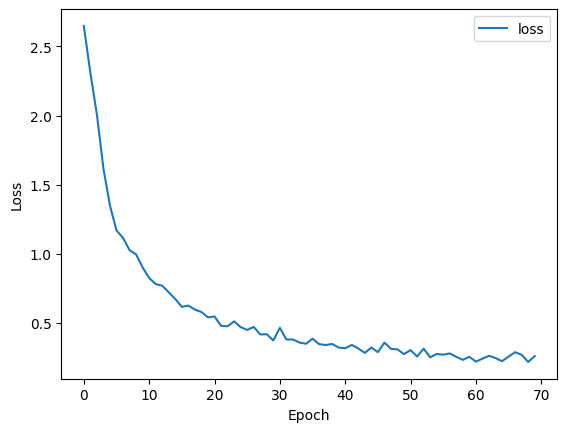

In [8]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss'])
plt.show()

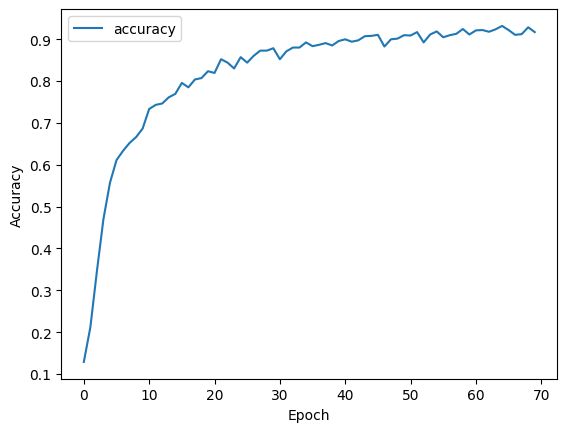

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Audio_Dataset/freinds_audio_recognition.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
